In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,RandomTranslation,RandomBrightness,RandomContrast, Conv2D,Input, MaxPooling2D, Flatten, GlobalAveragePooling2D,Dropout,Rescaling,RandomFlip,RandomRotation,RandomZoom
from keras.callbacks import ModelCheckpoint

In [2]:

ds = tf.keras.preprocessing.image_dataset_from_directory(
  "C:\AI/data/PlantVillage",
    image_size=(256,256),
    batch_size=32,
    shuffle=True

)

Found 2152 files belonging to 3 classes.


In [3]:
classes=ds.class_names

(32, 256, 256, 3)
[1 0 0 2 1 1 1 0 1 2 0 0 0 2 2 1 0 2 1 1 0 1 0 0 0 0 0 0 1 0 1 1]


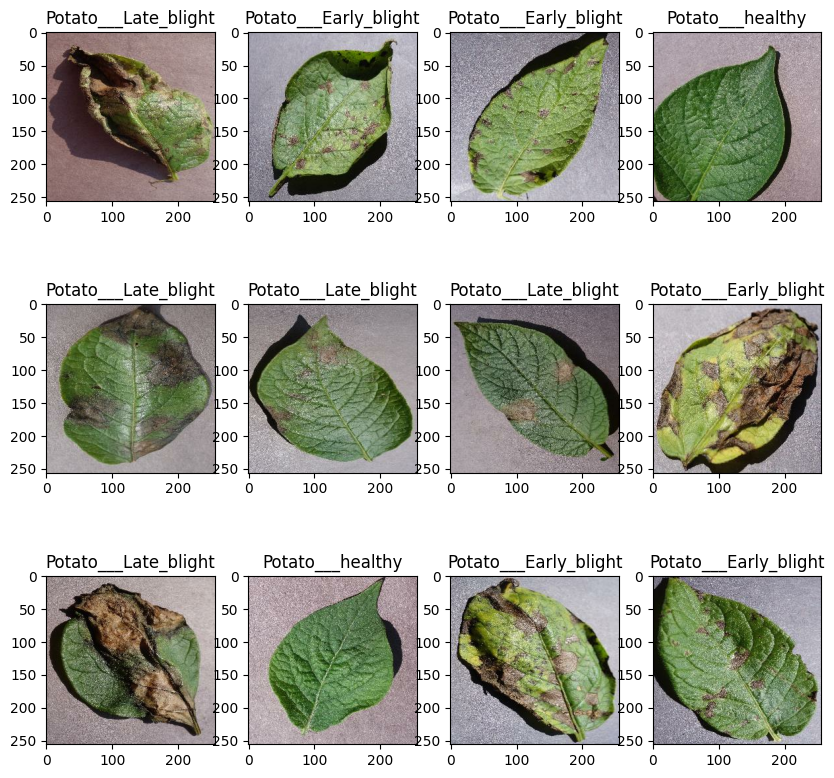

In [4]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in ds.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    for i in range(12):
       ax=plt.subplot(3,4,i+1)
        
       plt.title(classes[label_batch[i]])
       plt.imshow(image_batch[i].numpy().astype("int"))
       
    
    
    

In [5]:
train_size=0.8
len(ds)*train_size

54.400000000000006

In [6]:
train_ds=ds.take(54)

In [7]:
test_ds=ds.skip(54)

In [8]:
val_size=0.1
len(ds)*val_size

6.800000000000001

In [9]:
val_ds=test_ds.take(6)

In [10]:
test_ds=test_ds.skip(6)

In [11]:
len(test_ds)

8

In [12]:
model=tf.keras.Sequential([
    tf.keras.layers.Resizing(256,256,input_shape=(256,256,3)),

    tf.keras.layers.Rescaling(1.0/255),

    tf.keras.layers.RandomFlip(),
    tf.keras.layers.RandomRotation(0.2),
    Conv2D(32,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
      Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,activation="relu"),
    Dense(3,activation="softmax"),

    

    





    
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 256, 256, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 256, 256, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 256, 256, 3)      0         
 tion)                                                           
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                      

In [14]:
model.compile(optimizer="adam",metrics=["accuracy"],loss="sparse_categorical_crossentropy")

In [15]:
checkpoint = ModelCheckpoint(
    'best_model.h5',       # Modelin kaydedileceği dosya adı
    monitor='val_accuracy',    # Hangi metriği izlemek istediğimiz
    save_best_only=True,   # En iyi modelin kaydedilmesini sağlarız
    mode='auto',            # 'min' minumum val_loss değeri için, 'max' ise maksimum doğruluk için kullanılır
    verbose=1              # Kayıt işlemi hakkında bilgi almak için
)


In [16]:
history=model.fit(
train_ds,
epochs=25,
verbose=1,
validation_data=(val_ds),
callbacks=[checkpoint]
)

Epoch 1/25
54/54 [==============================] - ETA: 0s - loss: 0.8994 - accuracy: 0.4763
Epoch 1: val_accuracy improved from -inf to 0.46875, saving model to best_model.h5
54/54 [==============================] - 52s 937ms/step - loss: 0.8994 - accuracy: 0.4763 - val_loss: 0.8067 - val_accuracy: 0.4688
Epoch 2/25
54/54 [==============================] - ETA: 0s - loss: 0.6493 - accuracy: 0.7118
Epoch 2: val_accuracy improved from 0.46875 to 0.78125, saving model to best_model.h5
54/54 [==============================] - 53s 984ms/step - loss: 0.6493 - accuracy: 0.7118 - val_loss: 0.5125 - val_accuracy: 0.7812
Epoch 3/25
54/54 [==============================] - ETA: 0s - loss: 0.4472 - accuracy: 0.7998
Epoch 3: val_accuracy improved from 0.78125 to 0.90104, saving model to best_model.h5
54/54 [==============================] - 56s 1s/step - loss: 0.4472 - accuracy: 0.7998 - val_loss: 0.2722 - val_accuracy: 0.9010
Epoch 4/25
54/54 [==============================] - ETA: 0s - loss: 0.

In [20]:
model.evaluate(test_ds) 

8/8 [==============================] - 2s 172ms/step - loss: 0.0454 - accuracy: 0.9828


[0.045385923236608505, 0.982758641242981]

In [21]:
prediction=model.predict(test_ds)

8/8 [==============================] - 3s 171ms/step


In [22]:
prediction=np.argmax(prediction,axis=1)

In [29]:
classes

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [30]:
predicted_labels = [classes[i] for i in prediction]

In [31]:
predicted_labels[:5]

['Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___Early_blight']

In [23]:
model.save("C:/AI/models/3")

INFO:tensorflow:Assets written to: C:/AI/models/3\assets


INFO:tensorflow:Assets written to: C:/AI/models/3\assets


In [33]:
prediction

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 0, 1, 2, 2,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2,
       1, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 0, 0,
       1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1], dtype=int64)

AttributeError: '_SkipDataset' object has no attribute 'numpy'